In [1]:
import matplotlib.pyplot as plt, numpy as np, pandas as pd,seaborn as sns

In [2]:
df = pd.read_csv('delivery_time.csv')

In [3]:
df = df[df['Delivery Time'] != 29]
df = df[df['Delivery Time'] != 21.5]
df = df[df['Delivery Time'] != 17.90]

df



,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
5,15.35,6
6,19.00,7
7,9.50,3
9,18.75,9
10,19.83,8
11,10.75,4


In [4]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
5,15.35,6


In [5]:
df.shape

(18, 2)

In [6]:
df.describe()

,Delivery Time,Sorting Time
count,18.000000,18.000000
mean,15.789444,5.833333
std,4.369494,2.382534
min,8.000000,2.000000
25%,12.397500,4.000000
50%,16.015000,6.000000
75%,18.937500,7.000000
max,24.000000,10.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 19
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  18 non-null     float64
 1   Sorting Time   18 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 432.0 bytes


In [8]:
df.isnull().values

array([[False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False]])

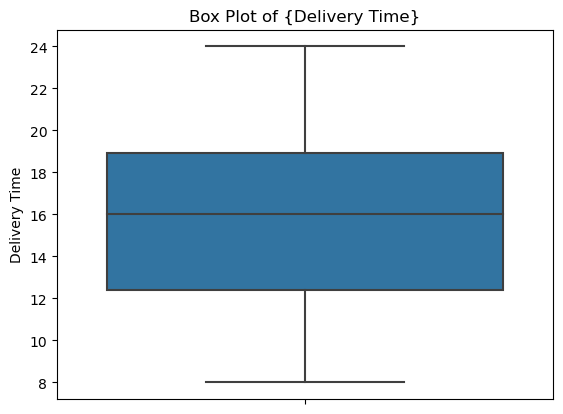

In [9]:
sns.boxplot(y=df['Delivery Time'])
plt.title('Box Plot of {Delivery Time}')
plt.show()

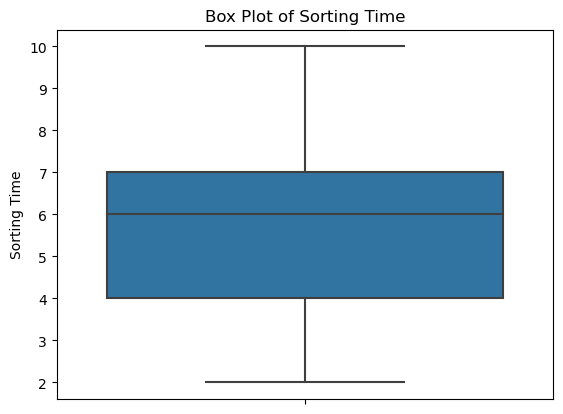

In [10]:
sns.boxplot(y=df['Sorting Time'])
plt.title('Box Plot of Sorting Time')
plt.show()

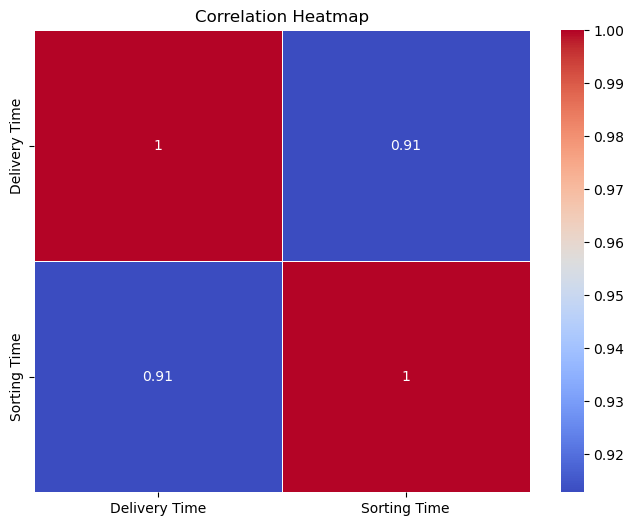

In [11]:
data = df

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
5,15.35,6
6,19.00,7
7,9.50,3
9,18.75,9
10,19.83,8
11,10.75,4


In [13]:
x = df["Sorting Time"].values
y = df["Delivery Time"].values

Text(0, 0.5, 'Delivery T')

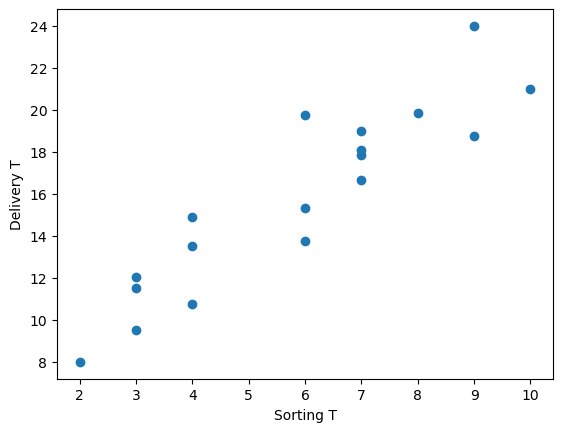

In [14]:
plt.scatter(x,y)
plt.xlabel("Sorting T")
plt.ylabel("Delivery T")

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [16]:
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(x_train, y_train)

LinearRegression()

In [20]:
y_train

array([24.  , 13.5 , 12.03, 18.75, 13.75, 19.75, 11.5 ,  9.5 , 17.83,
       14.88, 18.11, 19.83])

In [21]:
y_predict_train = lr.predict(x_train)
y_predict_train

array([21.49533619, 13.22430615, 11.57010014, 21.49533619, 16.53271817,
       16.53271817, 11.57010014, 11.57010014, 18.18692418, 13.22430615,
       18.18692418, 19.84113019])

In [25]:
y_predict_test = lr.predict(x_test)
y_predict_test

array([13.22430615, 16.53271817,  9.91589413, 23.1495422 , 18.18692418,
       18.18692418])

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_predict_test)
r2 = r2_score(y_test, y_predict_test)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print('RMSE:',rmse)

Mean Squared Error: 3.124017997711842
R-squared: 0.8462413007869092
RMSE: 1.7674891789518379


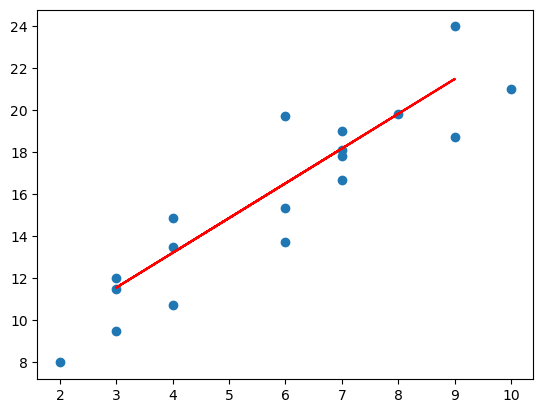

In [22]:
plt.scatter(x,y)
plt.plot(x_train, y_predict_train, color='red')

In [23]:
def Delivery(lr):
    new_sorting_time = float(input('Enter Sorting Time: '))
    new_sorting_time = np.array(new_sorting_time).reshape(1, 1)

    pDt = lr.predict(new_sorting_time)
    print('Predicted Delivery Time is:', pDt)

In [24]:
Delivery(lr)

Enter Sorting Time: 5
Predicted Delivery Time is: [14.87851216]
